<a href="https://colab.research.google.com/github/pratikiiitb2013/EVA/blob/master/Session4/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This code is an improvement over last network - 
* In last network, batch normalization and dropout are used to improve upon Vacc.
* Last code, best Vacc = 99.38
* To improve further, in this code, we are trying #epochs, reducing learning rate and increasing batch size.
  
### Learnings - 
* Reducing learning rate is needed as otherwise, loss is stepping across global minima, so we need to reduce the step size as the loss comes near optimal point.
* Also 10 epochs are very less to reach high accuracy levels, we need to train further for more epochs.
* Increasing batch size may increase accuracy but not always.

### Conclusion
* We are able to increase accuracy from 99.38 to 99.50 by using reduced learning rate and increasing epoch size.
* We might be able to increase accuracy further by using optimized batch size.

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


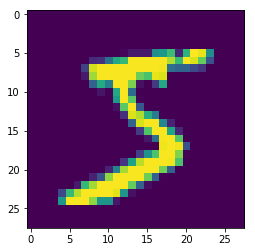

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(18, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(Convolution2D(23, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(18, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(Convolution2D(23, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(18, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(Convolution2D(23, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(23, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(23, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(23, (3, 3), activation="relu")`


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 18)        180       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 18)        72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 18)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 23)        3749      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 23)        92        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 23)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 18)        432       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])




Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 22s 359us/step - loss: 0.1368 - acc: 0.9562 - val_loss: 0.0575 - val_acc: 0.9812
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 19s 324us/step - loss: 0.0583 - acc: 0.9815 - val_loss: 0.0380 - val_acc: 0.9871
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 20s 339us/step - loss: 0.0455 - acc: 0.9857 - val_loss: 0.0252 - val_acc: 0.9912
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 19s 311us/step - loss: 0.0360 - acc: 0.9890 - val_loss: 0.0247 - val_acc: 0.9921
Epoch 5/20

Epoch 00005: LearningRateScheduler settin

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[6.80819246e-12 2.14906914e-09 1.62677978e-08 2.59823718e-09
  8.22600384e-14 4.79317541e-13 8.61303997e-17 1.00000000e+00
  6.60940833e-12 1.18172605e-09]
 [2.57024912e-09 4.62926010e-07 9.99999523e-01 3.42649693e-11
  5.29735557e-14 6.43712416e-17 8.80911566e-10 1.47479332e-13
  4.56432071e-12 3.60316974e-15]
 [6.80028950e-11 9.99999642e-01 1.42772427e-09 6.32259245e-11
  1.77841343e-07 2.99523251e-09 4.88189045e-08 1.28909633e-07
  3.31324590e-09 5.65415992e-10]
 [9.99998450e-01 3.05823915e-13 1.19407133e-07 7.61094451e-11
  5.58804322e-11 4.91218394e-12 1.28098134e-06 4.15836393e-11
  1.02577900e-07 5.74179149e-10]
 [6.47200067e-13 2.18991131e-10 1.44302821e-12 3.74559455e-12
  9.99999285e-01 1.02649540e-12 1.43717982e-09 1.02751412e-12
  4.99845554e-10 7.37488790e-07]
 [5.31867536e-11 9.99999523e-01 1.24875099e-09 1.04863245e-11
  8.65285728e-08 1.06164980e-10 2.30340387e-08 3.10425918e-07
  3.59106994e-10 7.65267516e-10]
 [1.11591695e-14 3.23849308e-10 7.88429252e-11 7.80201042e